## 2. Sliding Window Algorithm

In [1]:
setwd("/Users/jacobbradley/Documents/CCG/Code")

### Packages

In [2]:
install.packages("tidyverse")
library(tidyverse)
# Data Handling

if (!requireNamespace("BiocManager"))
    install.packages("BiocManager")
BiocManager::install()
library(BiocManager)
# General bioinformatics packages

library(BSgenome)
library(BSgenome.Hsapiens.UCSC.hg19)
# Human genome build GChr37


The downloaded binary packages are in
	/var/folders/g9/9x6m35fn5ydf88vdlm9n1vg80000gn/T//RtmpDC2DZE/downloaded_packages


── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.8
✔ tidyr   0.8.2     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required namespace: BiocManager
Bioconductor version 3.8 (BiocManager 1.30.3), R 3.5.1 (2018-07-02)
Update old packages: 'AnnotationHub', 'backports', 'BiocManager',
  'BiocParallel', 'Biostrings', 'biovizBase', 'broom', 'callr', 'circlize',
  'class', 'clusterProfiler', 'codetools', 'DESeq', 'EDASeq', 'edgeR', 'ELMER',
  'ensembldb', 'foreign', 'gdsfmt', 'GenomicAlignments', 'gganimate', 'ggpubr',
  'grImport', 'Gviz', 'haven', 'htmlTable', 'httpuv', 'httr', 'IRdisplay',
  'jsonlite', 'knitr', 'lattice', 'limma', 'markdown', 'MASS', 'Matrix',
  'mclust', 'mgcv', 'openssl', 'pathview', 'pillar', 'proce

In [3]:
source("TMB_Funcs.txt")
# My Stuff!

In [4]:
path_name <- "/Volumes/CCG8/processed_data"

### Attempt a very limited sliding window algorithm (1 Chromosome, 1 Data Set)

In [7]:
breast_data <- cbio_getData(path_name, "brca", test = FALSE)
genome <- BSgenome.Hsapiens.UCSC.hg19

#load a sample data set (in this case TCGA breast cancer data)
#load a reference genome to slide through

Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "brca_bccrc"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Strand = col_integer(),
  `MA:FIS` = col_double(),
  t_depth = col_integer(),
  n_depth = col_integer(),
  ALLELE_NUM = col_integer(),
  DISTANCE = col_integer(),
  HGNC_ID = col_integer(),
  PUBMED = col_number(),
  PICK = col_integer(),
  HGVS_OFFSET = col_integer(),
  MINIMISED = col_integer(),
  ExAC_AF = col_double(),
  ExAC_AF_AFR = col_double(),
  ExAC_AF_AMR = col_double(),
  ExAC_AF_EAS = col_double(),
  ExAC_AF_FIN = col_double(),
  ExAC_AF_NFE = col_double()
  # ... with 3 more columns
)
See spec(...) for full column specifications.


[1] 65


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "brca_bccrc_xenograft_2014"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  `MA:FIS` = col_double()
)
See spec(...) for full column specifications.


[1] 116


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "brca_broad"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  ALLELE_NUM = col_integer(),
  PICK = col_integer(),
  n_depth = col_integer(),
  HGNC_ID = col_integer(),
  ExAC_AF_AMR = col_double(),
  t_depth = col_integer(),
  DISTANCE = col_integer(),
  ExAC_AF_SAS = col_double(),
  GENE_PHENO = col_integer(),
  ExAC_AF_AFR = col_double(),
  ExAC_AF_NFE = col_double(),
  ExAC_AF_EAS = col_double(),
  ExAC_AF_FIN = col_double(),
  HGVS_OFFSET = col_integer(),
  ExAC_AF = col_double()
  # ... with 2 more columns
)
See spec(...) for full column specifications.


[1] 103


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "brca_igr_2015"


Parsed with column specification:
cols(
  .default = col_character(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  Freq_Variant_Allele_Normal = col_double(),
  Freq_Variant_Allele_Tumor = col_double()
)
See spec(...) for full column specifications.


[1] 211


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "brca_mbcproject_wagle_2017"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  NCBI_Build = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Transcript_Exon = col_integer(),
  Transcript_Position = col_integer(),
  UniProt_AApos = col_integer(),
  COSMIC_total_alterations_in_gene = col_integer(),
  gc_content = col_double(),
  CCLE_ONCOMAP_total_mutations_in_gene = col_integer(),
  i_1000gp3_AC = col_integer(),
  i_1000gp3_AF = col_double(),
  i_1000gp3_AFR_AF = col_double(),
  i_1000gp3_AMR_AF = col_double(),
  i_1000gp3_AN = col_integer(),
  i_1000gp3_DP = col_integer(),
  i_1000gp3_EAS_AF = col_double(),
  i_1000gp3_EUR_AF = col_double(),
  i_1000gp3_NS = col_integer(),
  i_1000gp3_SAS_AF = col_double()
  # ... with 60 more columns
)
See spec(...) for full column specifications.
Warning message in rbind(names(probs), probs_f):
“number of columns of result is not a multiple of vector length (arg 1)”Warning message:
“1385 pa

[1] 156


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "brca_metabric"


Parsed with column specification:
cols(
  .default = col_character(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer()
)
See spec(...) for full column specifications.


[1] 2355


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "brca_sanger"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer()
)
See spec(...) for full column specifications.


[1] 100


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "brca_tcga"


Warning message:
“Missing column names filled in: 'X54' [54]”Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Score = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  stop_WU = col_integer(),
  X54 = col_double(),
  tumor_vaf = col_double(),
  normal_ref_reads = col_integer(),
  start_WU = col_integer(),
  strand_WU = col_integer(),
  tumors_var_reads = col_integer(),
  normal_vaf = col_double(),
  tumor_ref_reads = col_integer(),
  normal_var_reads = col_integer()
)
See spec(...) for full column specifications.
Warning message in rbind(names(probs), probs_f):
“number of columns of result is not a multiple of vector length (arg 1)”Warning message:
“3282 parsing failures.
row # A tibble: 5 x 5 col     row col     expected  actual file                                         

[1] 981


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "brca_tcga_pan_can_atlas_2018"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  NCALLERS = col_integer(),
  n_depth = col_integer(),
  t_depth = col_integer()
)
See spec(...) for full column specifications.


[1] 1009


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "brca_tcga_pub"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Score = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  ALLELE_NUM = col_integer(),
  PICK = col_integer(),
  n_depth = col_integer(),
  HGNC_ID = col_integer(),
  ExAC_AF_AMR = col_double(),
  t_depth = col_integer(),
  `MA:FIS` = col_double(),
  DISTANCE = col_integer(),
  ExAC_AF_SAS = col_double(),
  GENE_PHENO = col_integer(),
  ExAC_AF_AFR = col_double(),
  ExAC_AF_NFE = col_double(),
  stop_wu = col_integer(),
  stop_WU = col_integer()
  # ... with 11 more columns
)
See spec(...) for full column specifications.
Warning message in rbind(names(probs), probs_f):
“number of columns of result is not a multiple of vector length (arg 1)”Warning message:
“42 parsing failures.
row # A tibble: 5 x 5 col     row col      expected        actual file                                    expect

[1] 507


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "brca_tcga_pub2015"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  ALLELE_NUM = col_integer(),
  AA_MAF = col_double(),
  ASN_MAF = col_double(),
  AFR_MAF = col_double(),
  EA_MAF = col_double(),
  PUBMED = col_integer()
)
See spec(...) for full column specifications.
Warning message in rbind(names(probs), probs_f):
“number of columns of result is not a multiple of vector length (arg 1)”Warning message:
“30 parsing failures.
row # A tibble: 5 x 5 col     row col    expected      actual                file                         expected   <int> <chr>  <chr>         <chr>                 <chr>                        actual 1  4642 PUBMED no trailing … ,132,864,314,508,700  '/Volumes/CCG8/processed_

[1] 816


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] 4194


In [51]:
window_size <- 100000
jump_length <- 100000

In [55]:
breast_X_slide <- chromosome_slide(breast_data, global_tmb_table = NULL, "X", window_size, jump_length)

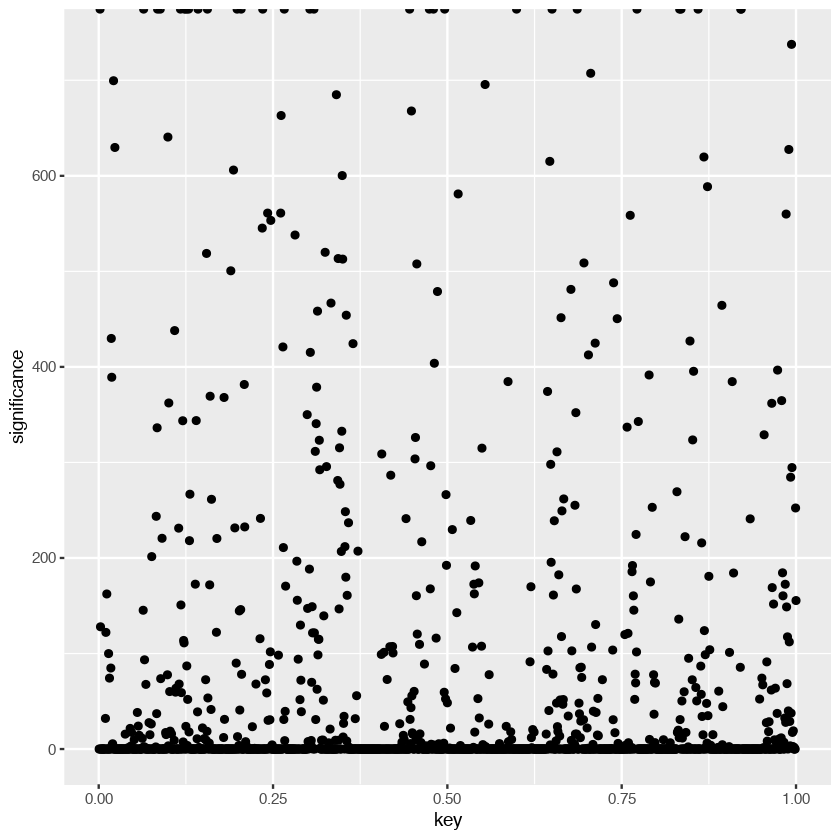

In [56]:
ggplot(breast_X_slide, aes(x = key, y = significance))+ geom_point()

### Do the same thing for the entire genome (1 Study)

In [57]:
window_size <- 100000
jump_length <- 100000

genome_length <- 0
for (i in 1:24) {
    genome_length <- genome_length + length(genome[[i]])
}

In [62]:
colnames(breast_data)

[1] "Hugo_Symbol"            "Chromosome"             "Start_Position"        
[4] "End_Position"           "Variant_Classification" "Variant_Type"          
[7] "Tumor_Sample_Barcode"   "study"

In [64]:
breast_gwas <- genome_slide(maf_file = breast_data, global_tmb_table = NULL, window_size, jump_length)


[1] "1"
[1] "2"
[1] "3"
[1] "4"
[1] "5"
[1] "6"
[1] "7"
[1] "8"
[1] "9"
[1] "10"
[1] "11"
[1] "12"
[1] "13"
[1] "14"
[1] "15"
[1] "16"
[1] "17"
[1] "18"
[1] "19"
[1] "20"
[1] "21"
[1] "22"
[1] "X"
[1] "Y"


In [65]:
write_tsv(path = '/Users/jacobbradley/Documents/CCG/Data/breast_gwas', x = breast_gwas)

#breast_gwas <- read_tsv('/Users/jacobbradley/Documents/CCG/Data/breast_gwas')


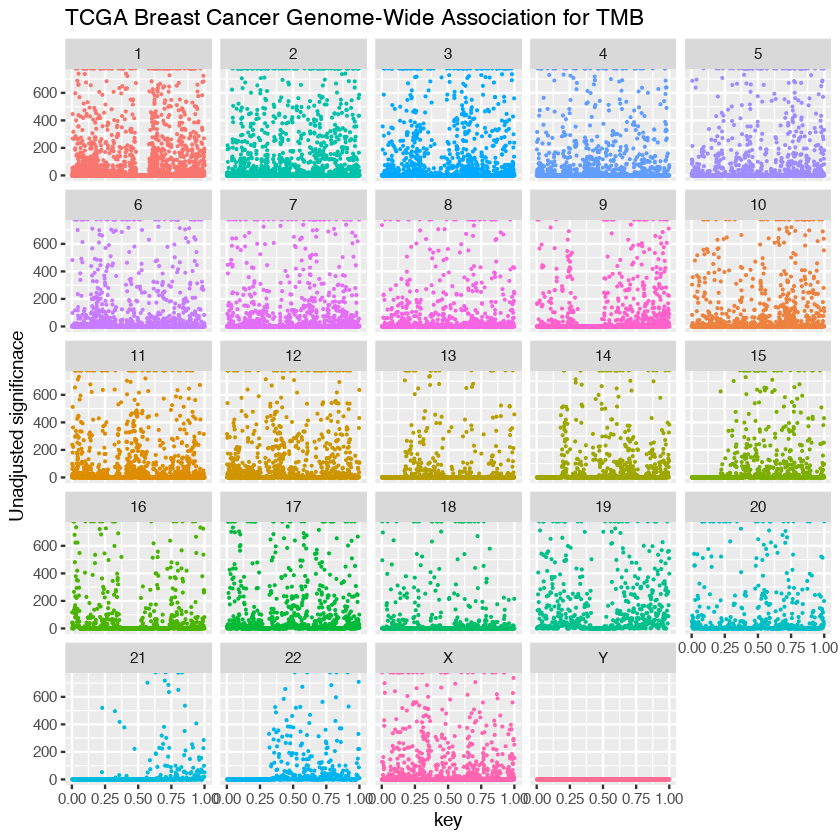

In [71]:
ggplot(breast_gwas, aes(x = key, y = significance, colour = chromosome, size = significance)) + 
    geom_point() + scale_size(range = c(0.1,0.1)) + theme(legend.position = "none") + labs(y = "Unadjusted significnace") + 
    ggtitle("TCGA Breast Cancer Genome-Wide Association for TMB") + facet_wrap(.~ factor(chromosome, levels = c(1:22, "X", "Y")))


In [7]:
tcga_brca_hotspots <- genome_slide(maf_file = new_data, global_tmb_table = NULL, window_size, jump_length)

Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "1"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "2"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "3"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "4"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "5"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "6"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "7"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "8"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "9"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "10"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "11"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "12"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "13"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "14"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "15"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "16"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "17"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "18"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "19"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "20"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "21"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "22"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "X"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "Y"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

In [9]:
write_tsv(path = '/Users/jacobbradley/Documents/CCG/Data/tcga_brca_hotspots', x = tcga_brca_hotspots)

#tcga_brca_hotspots <- read_tsv('/Users/jacobbradley/Documents/CCG/Data/tcga_brca_hotspots')

In [11]:
nsclc_data <- read_tsv("/Volumes/CCG8/processed_data/nsclc_tcga_broad_2016/data_mutations_extended.txt", skip = 1)

Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Strand = col_integer(),
  `MA:FIS` = col_double(),
  t_depth = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_depth = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  ALLELE_NUM = col_integer(),
  DISTANCE = col_integer(),
  HGNC_ID = col_integer(),
  PICK = col_integer(),
  HGVS_OFFSET = col_integer(),
  MINIMISED = col_integer(),
  ExAC_AF = col_double(),
  ExAC_AF_AFR = col_double(),
  ExAC_AF_AMR = col_double()
  # ... with 24 more columns
)
See spec(...) for full column specifications.


In [12]:
tcga_nsclc_hotspots <- genome_slide(maf_file = nsclc_data, global_tmb_table = NULL, window_size, jump_length)

Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "1"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "2"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "3"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "4"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "5"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "6"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "7"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "8"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "9"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "10"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "11"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "12"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "13"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "14"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "15"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "16"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "17"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "18"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "19"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "20"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "21"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "22"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "X"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "Y"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

In [13]:
write_tsv(path = '/Users/jacobbradley/Documents/CCG/Data/tcga_nsclc_hotspots', x = tcga_nsclc_hotspots)

#tcga_nsclc_hotspots <- read_tsv('/Users/jacobbradley/Documents/CCG/Data/tcga_nsclc_hotspots')

In [14]:
coadread_data <- read_tsv("/Volumes/CCG8/processed_data/coadread_tcga/data_mutations_extended.txt")#, skip = 1)

Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer()
)
See spec(...) for full column specifications.


In [17]:
tcga_coadread_hotspots <- genome_slide(maf_file = coadread_data, global_tmb_table = NULL, window_size, jump_length)

Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "1"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "2"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "3"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "4"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "5"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "6"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "7"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "8"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "9"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "10"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "11"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "12"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "13"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "14"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "15"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "16"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "17"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "18"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "19"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "20"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "21"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "22"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "X"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "Y"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

In [25]:
write_tsv(path = '/Users/jacobbradley/Documents/CCG/Data/tcga_coadread_hotspots', x = tcga_coadread_hotspots)

#tcga_coadread_hotspots <- read_tsv('/Users/jacobbradley/Documents/CCG/Data/tcga_coadread_hotspots')

### Running on a selected subset of the chromosome

In [74]:
breast_gwas_iter1 <- genome_restricted_slide(maf_file = breast_data, previous_run = breast_gwas, zoom = 10, global_tmb_table = NULL, coverage = 1)


[1] "1"
[1] "2"
[1] "3"
[1] "4"
[1] "5"
[1] "6"
[1] "7"
[1] "8"
[1] "9"
[1] "10"
[1] "11"
[1] "12"
[1] "13"
[1] "14"
[1] "15"
[1] "16"
[1] "17"
[1] "18"
[1] "19"
[1] "20"
[1] "21"
[1] "22"
[1] "X"
[1] "Y"


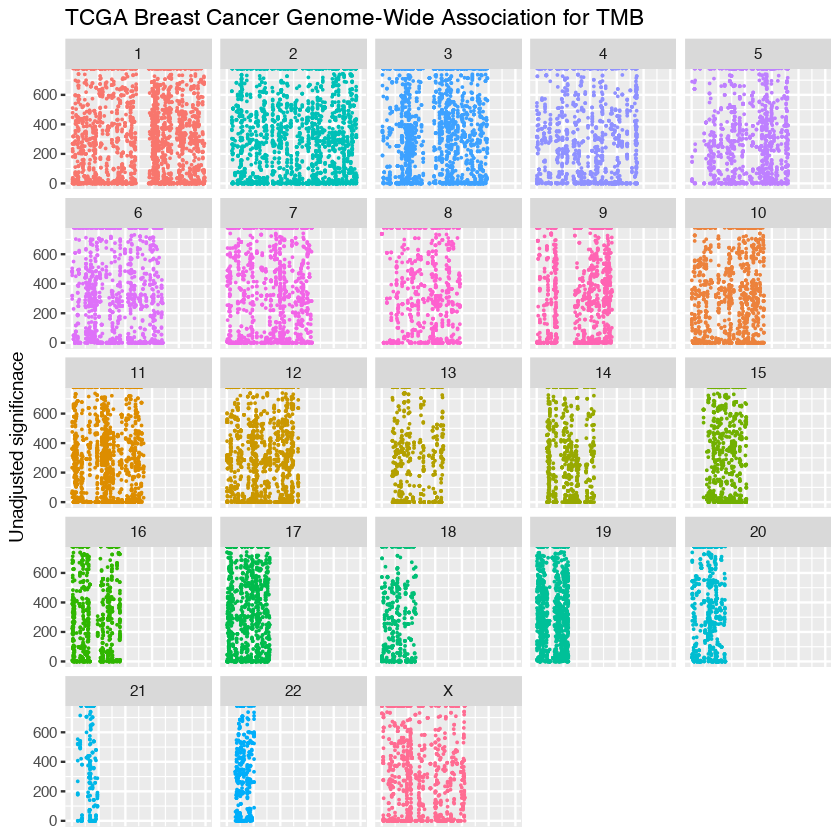

In [81]:
chromosomes <- c(1:22,"X","Y")

breast_gwas_iter1 %>%  
    #filter(significance > quantile(significance, .9)) %>% 
    ggplot(aes(x = position, y = significance, size = 0.01, colour = chromosome)) + 
    theme(axis.text.x = element_blank(), axis.ticks.x = element_blank())+
    geom_point() + scale_size(range = c(0.01,0.01)) + theme(legend.position = "none") + labs(x = NULL, y = "Unadjusted significnace") + 
    ggtitle("TCGA Breast Cancer Genome-Wide Association for TMB") + facet_wrap(~factor(chromosome, levels = chromosomes))

In [277]:
tcga_brca_hotspots_new_new <- genome_restricted_slide(maf_file = new_data, previous_run = tcga_brca_hotspots_new, zoom = 10, global_tmb_table = NULL, coverage = 10)

Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "1"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "2"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "3"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "4"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "5"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "6"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "7"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "8"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "9"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "10"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "11"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "12"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "13"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "14"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "15"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "16"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "17"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "18"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "19"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "20"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "21"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "22"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "X"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

[1] "Y"


Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”Warning message:
“Unknown columns: `Start_position`”Warning message:
“Unknown columns: `End_position`”

In [280]:
write_tsv(path = '/Users/jacobbradley/Documents/CCG/Data/tcga_brca_hotspots_new', x = tcga_brca_hotspots_new)

#tcga_brca_hotspots_new <- read_tsv('/Users/jacobbradley/Documents/CCG/Data/tcga_brca_hotspots_new')

In [281]:
write_tsv(path = '/Users/jacobbradley/Documents/CCG/Data/tcga_brca_hotspots_new_new', x = tcga_brca_hotspots_new_new)

#tcga_brca_hotspots_new_new <- read_tsv('/Users/jacobbradley/Documents/CCG/Data/tcga_brca_hotspots_new_new')

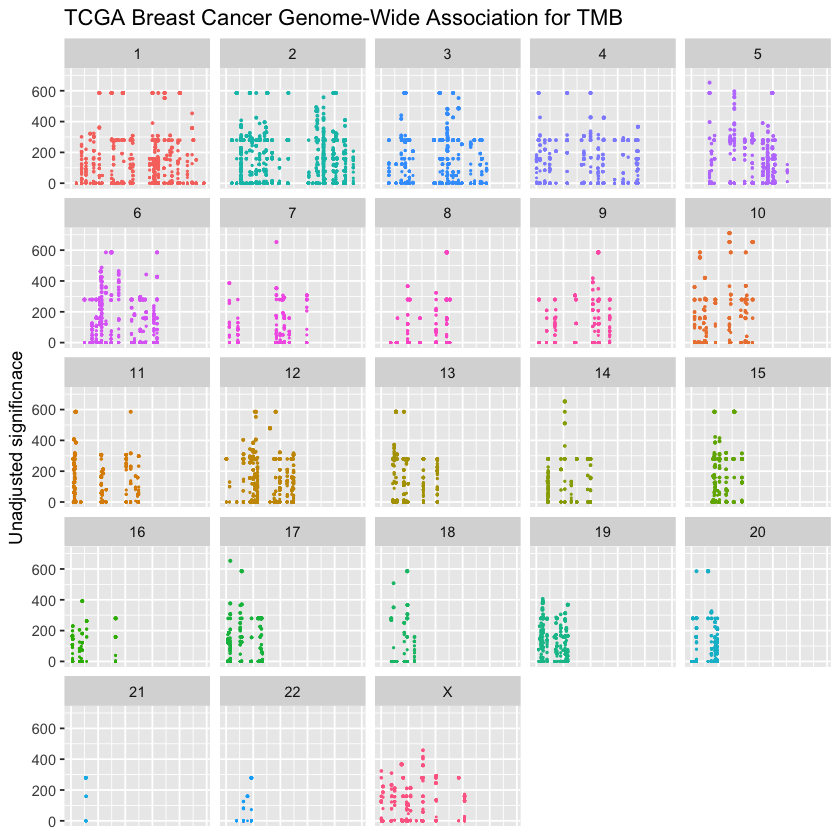

In [293]:
chromosomes <- c(1:22,"X","Y")

tcga_brca_hotspots_new_new %>%  
    #filter(significance > quantile(significance, .9)) %>% 
    ggplot(aes(x = position, y = significance, size = significance, colour = chromosome)) + 
    theme(axis.text.x = element_blank(), axis.ticks.x = element_blank())+
    geom_point() + scale_size(range = c(0.1,0.5)) + theme(legend.position = "none") + labs(x = NULL, y = "Unadjusted significnace") + 
    ggtitle("TCGA Breast Cancer Genome-Wide Association for TMB") + facet_wrap(~factor(chromosome, levels = chromosomes))


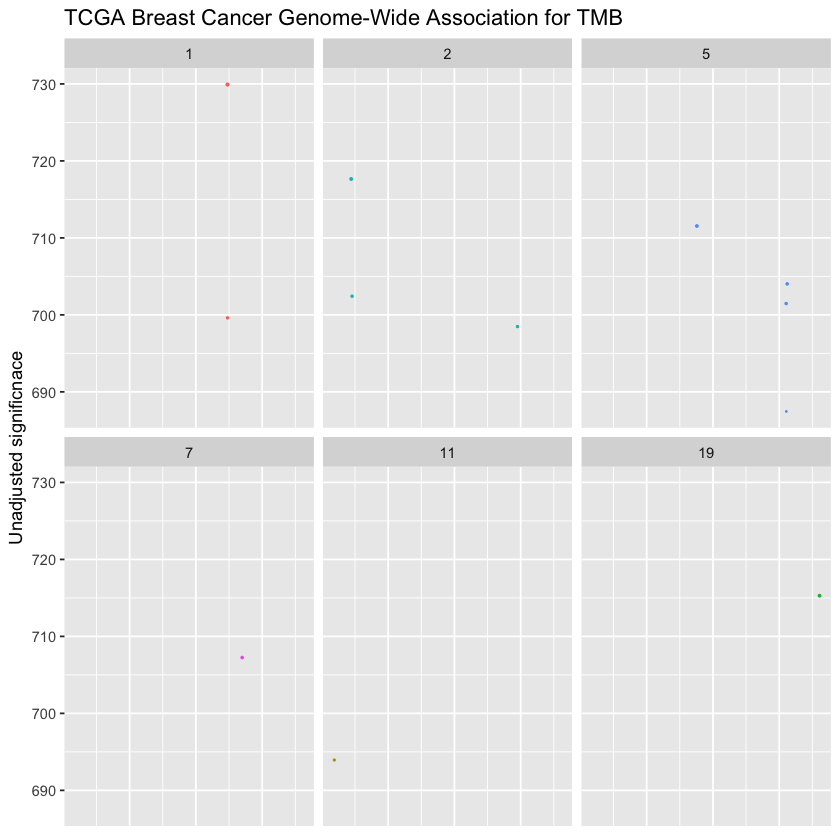

In [289]:
chromosomes <- c(1:22,"X","Y")

tcga_brca_hotspots %>%  
    filter(significance > quantile(significance, .999)) %>% 
    ggplot(aes(x = key, y = significance, size = significance, colour = chromosome)) + 
    theme(axis.text.x = element_blank(), axis.ticks.x = element_blank())+
    geom_point() + scale_size(range = c(0.1,0.5)) + theme(legend.position = "none") + labs(x = NULL, y = "Unadjusted significnace") + 
    ggtitle("TCGA Breast Cancer Genome-Wide Association for TMB") + facet_wrap(~factor(chromosome, levels = chromosomes))


In [292]:
tcga_brca_hotspots_new_new %>%  
    #filter(significance > quantile(significance, .99))  %>% 
    dim()

[1] 30730     4